In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

In [101]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
# Deleting any duplicate entry
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


__No duplicate record found1__

#### We are excluding below columns as they are not contributing to Label
1. Name
2. Ticket
3. Cabin
4. Embarked
5. Passenger ID

In [103]:
df =df.drop(columns =['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [104]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [106]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

__Age is having null value we will fix it.__

In [107]:
for i in df:
    print(df[i].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


In [108]:
# Data for missing age
missing_age =df[df.Age.isin(['Nan'])]
missing_age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


In [109]:
missing_age =df[df['Age'].isna()]
missing_age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [110]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

In [111]:
df.iloc[[859,863]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
859,0,3,male,29.699118,0,0,7.2292
863,0,3,female,29.699118,8,2,69.5500


In [112]:
# Again checing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [113]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
dtype: int64

In [114]:
# Converting Sex column to numbers
df['Sex'].replace({'male': 1, 'female': 0}, inplace =True)

In [115]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


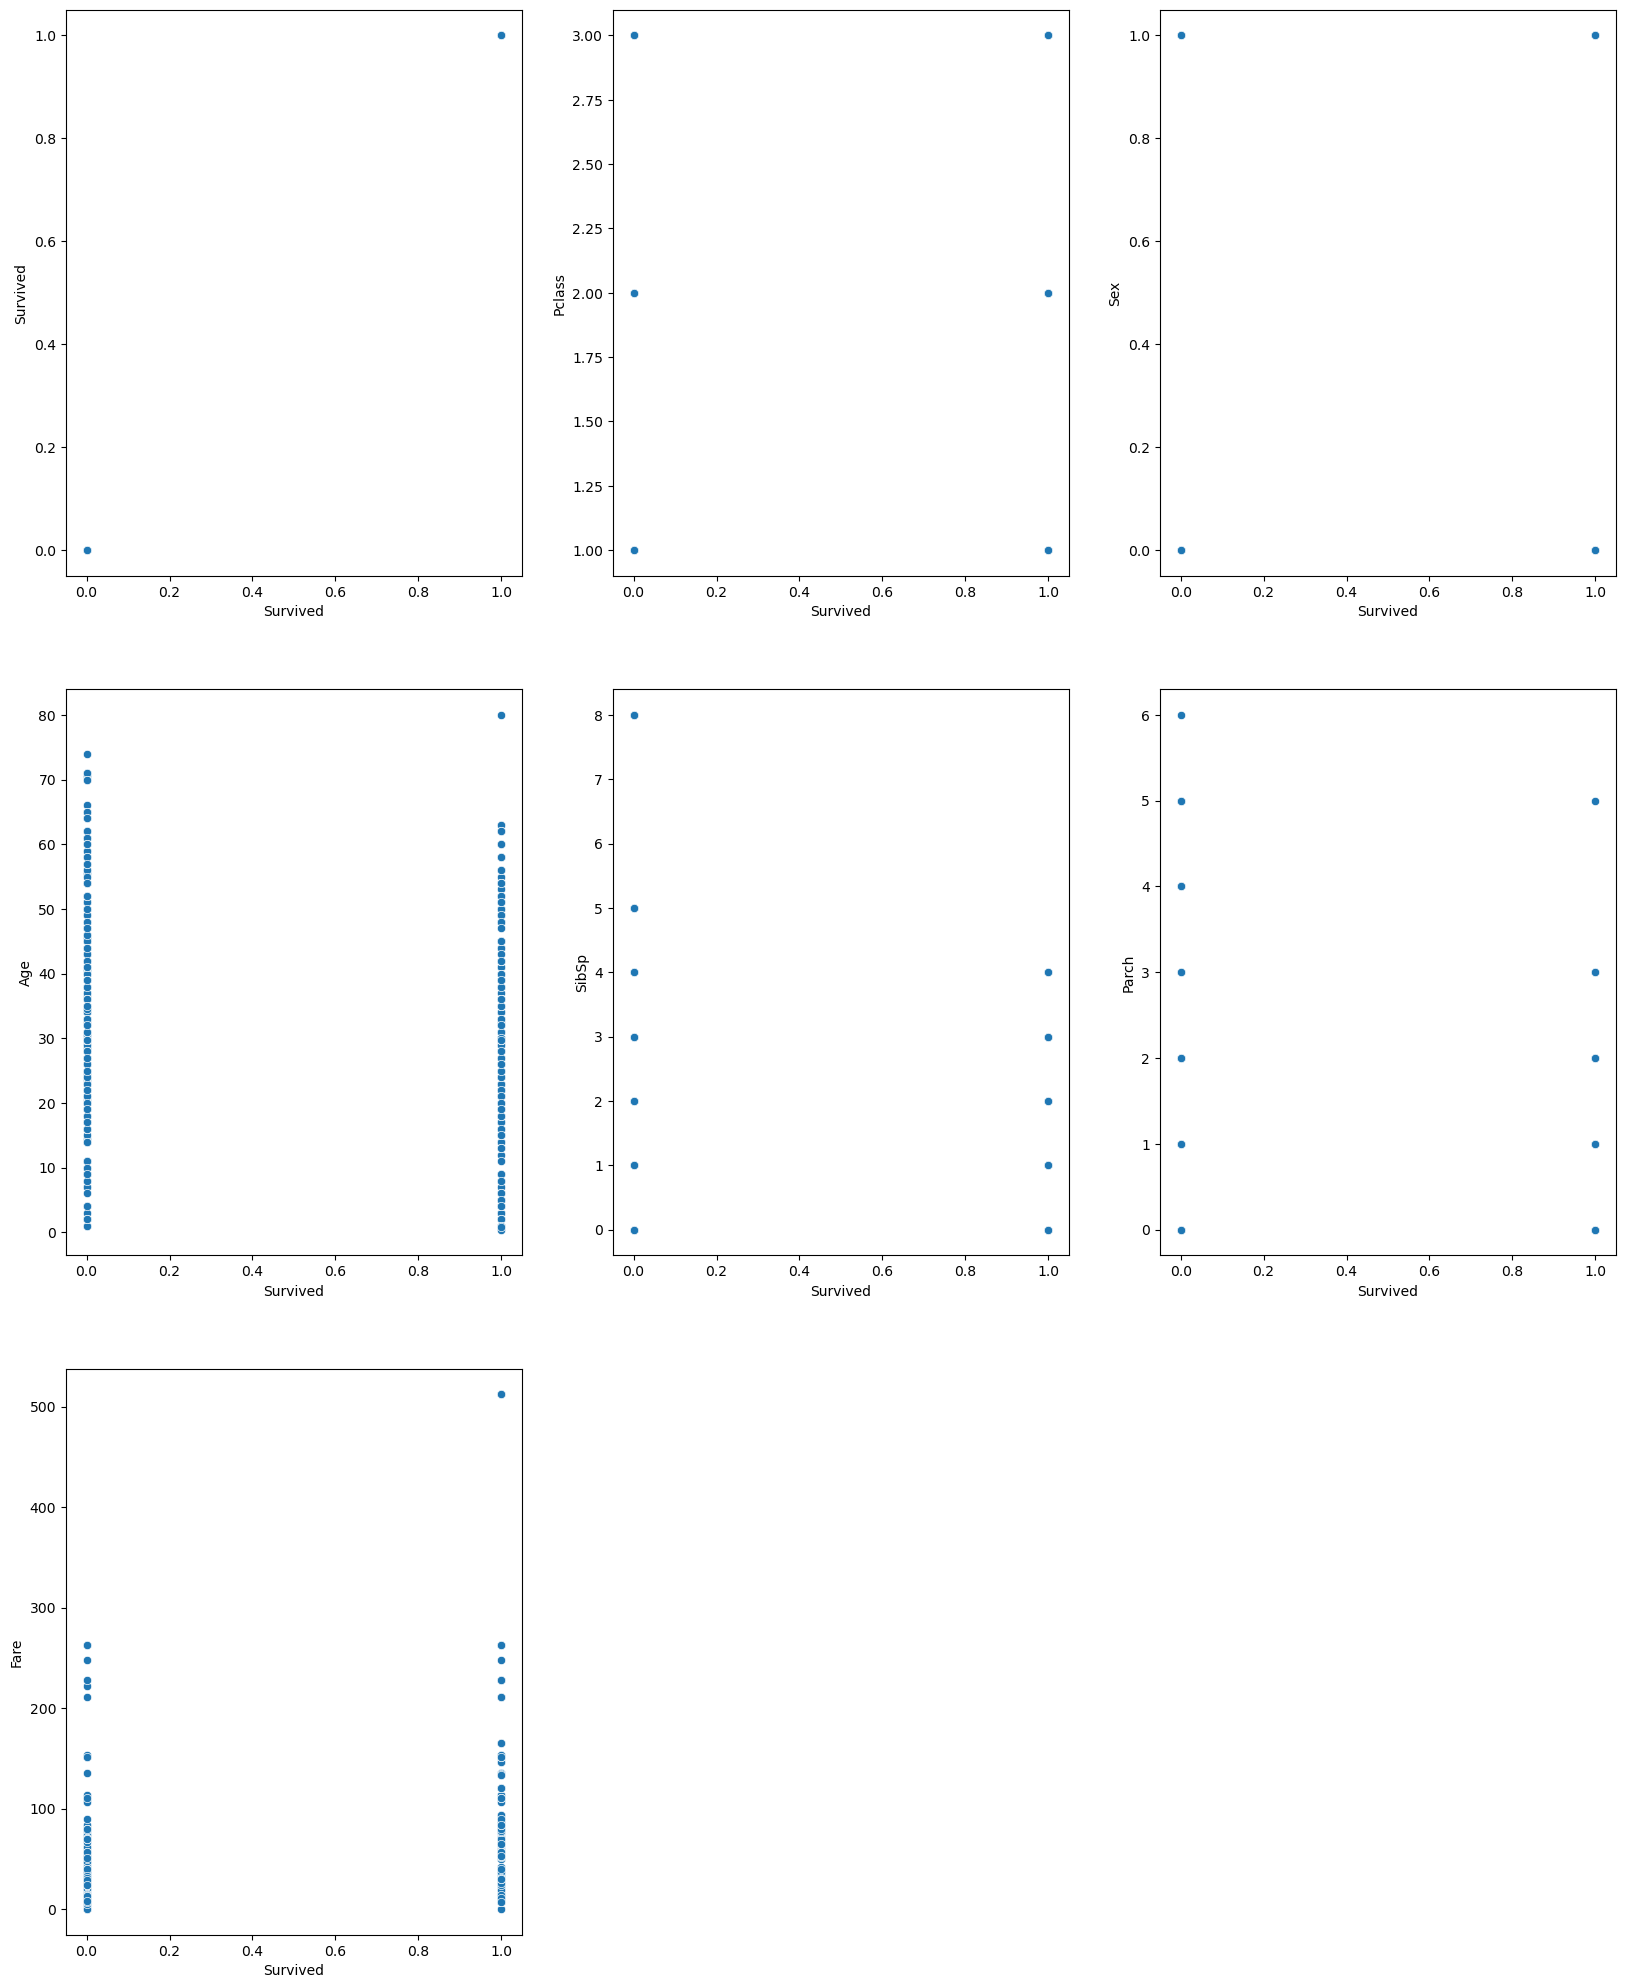

In [116]:
# Creating scatter plot to check relationship with feature and label
plt.figure(figsize =(20,25))
plotnumber =1

for i in df:
    if plotnumber <=7:
        plt.subplot(3,3, plotnumber)
        sns.scatterplot(x ='Survived', y =i, data =df)
        plt.xlabel('Survived')
        plt.ylabel(i)
    plotnumber+=1
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


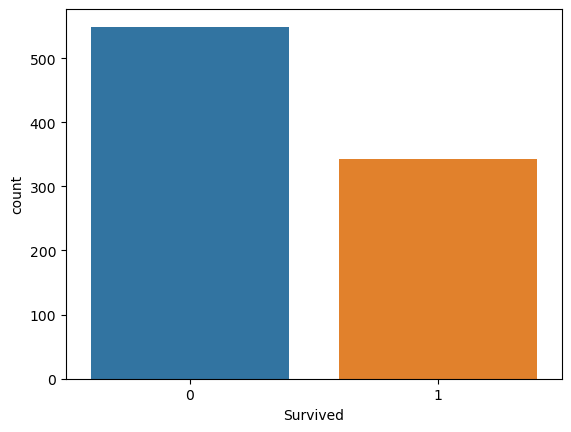

In [117]:
#Visualizing count of Survived
print(df['Survived'].value_counts())
sns.countplot(x ='Survived', data =df)
plt.show()

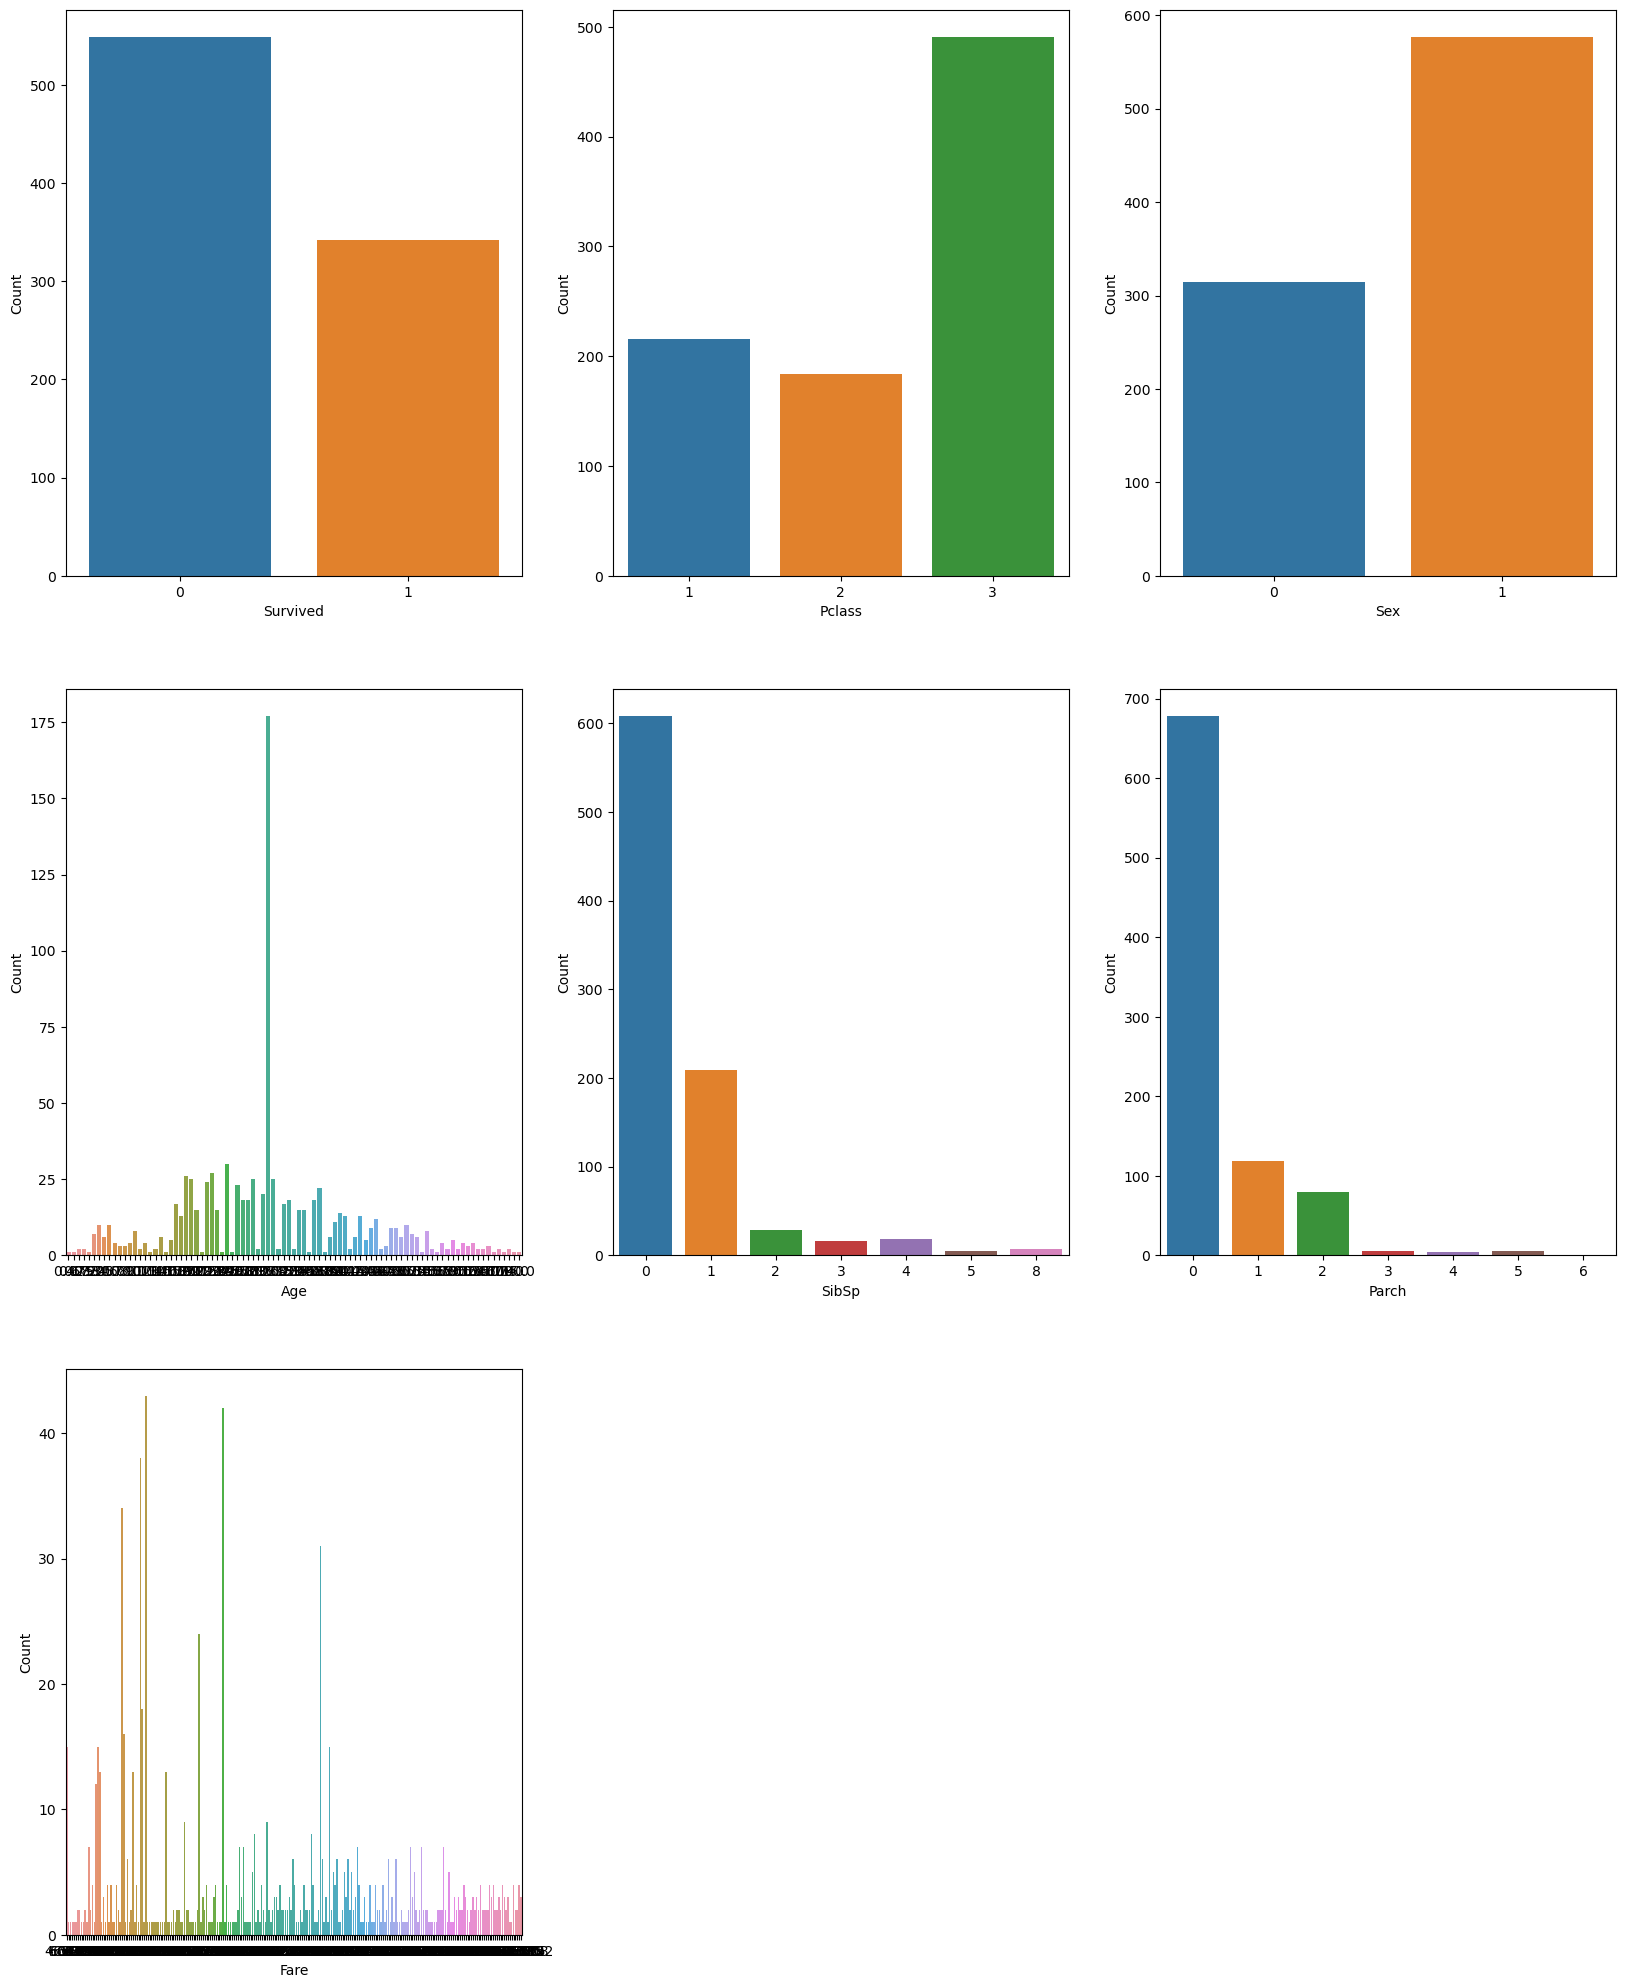

In [118]:
plt.figure(figsize=(20,25))
plotnumber =1

for i in df:
    if plotnumber <=7:
        plt.subplot(3,3, plotnumber)
        sns.countplot(x =i, data =df)
        plt.xlabel(i)
        plt.ylabel("Count")
    plotnumber+=1
plt.show()

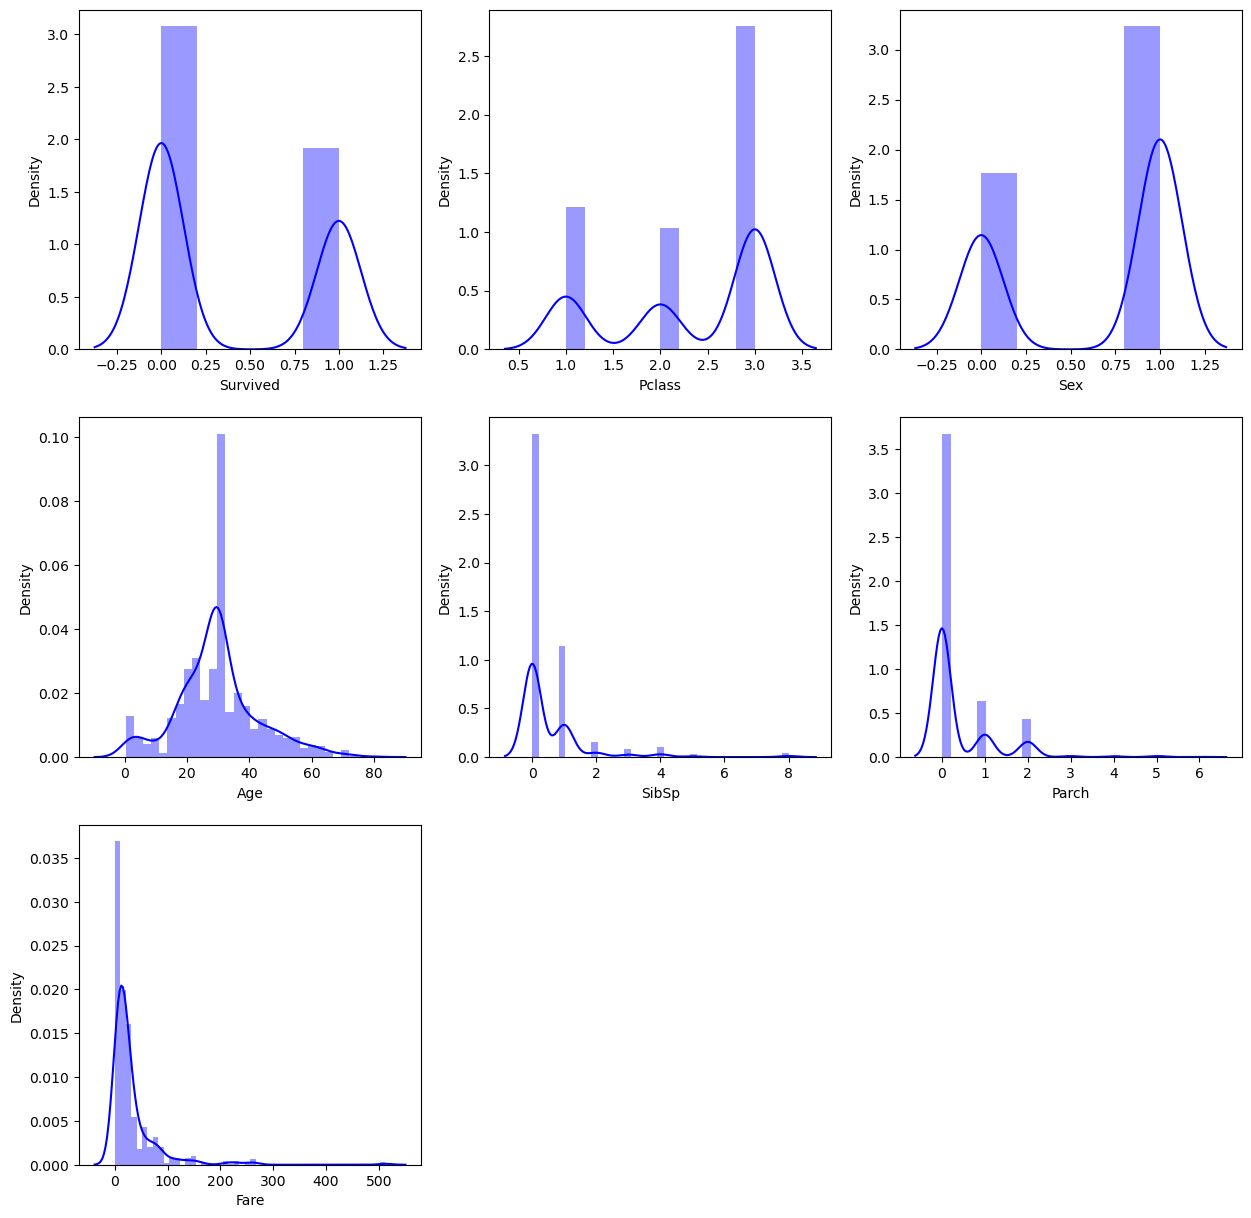

In [119]:
# Visualizing the distribution of numbers
plt.figure(figsize =(15,15))
plotnumber =1

for i in df:
    if plotnumber <=7:
        plt.subplot(3,3, plotnumber)
        sns.distplot(df[i], color ='b')
        plt.xlabel(i)
        
    plotnumber+=1
plt.show()

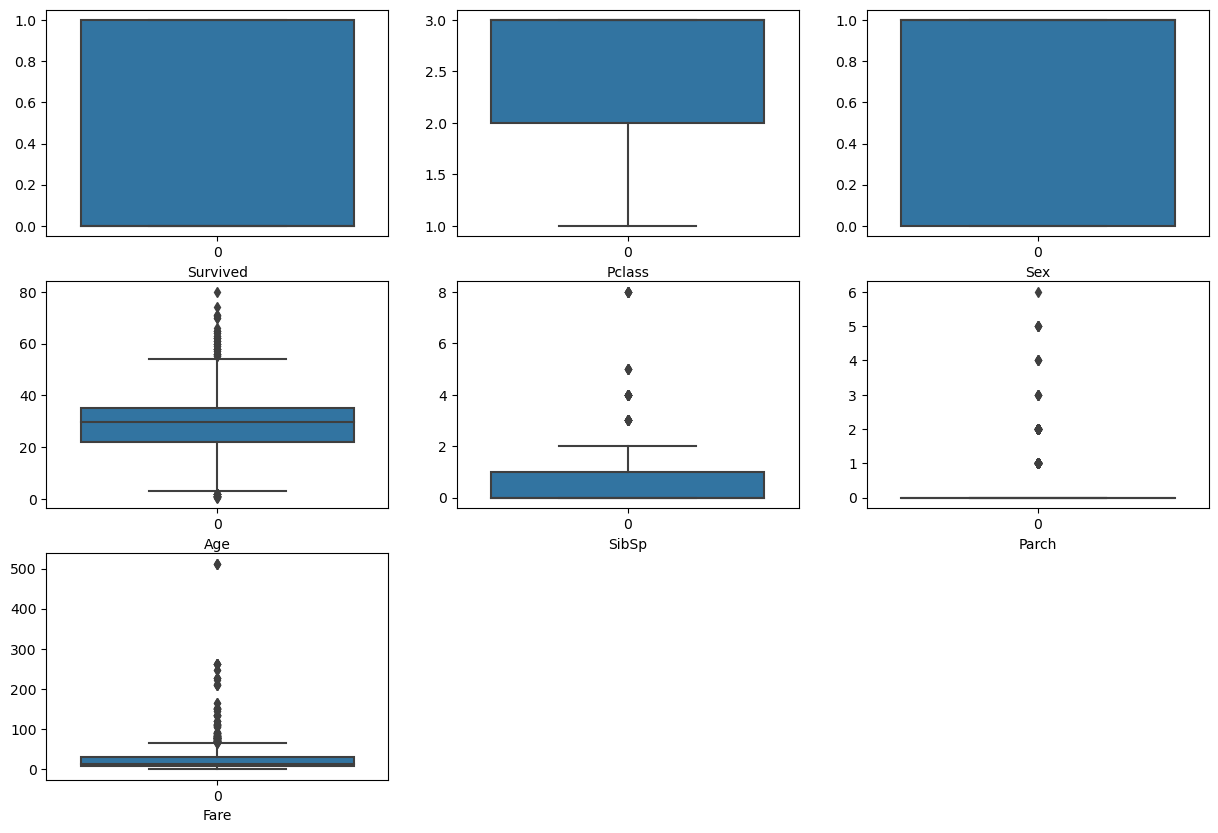

In [120]:
# Plotting box plot to find outliers
plt.figure(figsize =(15,10))
plotnumber=1

for i in df:
    if plotnumber <=7:
        ax =plt.subplot(3,3, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

__There are outliers in Age, Sibsp, Parch and Fare. We will try to fix it__

In [121]:
# Fixing outliers using IQR method

temp_df_iqr =df[['Age', 'SibSp', 'Parch', 'Fare']]

Q1= temp_df_iqr.quantile(0.25)
Q3 =temp_df_iqr.quantile(0.75)

IQR =Q3-Q1

#For higher side
for i in temp_df_iqr:
    high_iqr =Q3[i] + (1.5 * IQR[i])
    high_index =np.where(temp_df_iqr[i] > high_iqr)
    temp_df_iqr =temp_df_iqr.drop(temp_df_iqr.index[high_index])

In [122]:
#For lower side
for i in temp_df_iqr:
    high_iqr =Q1[i] - (1.5 * IQR[i])
    high_index =np.where(temp_df_iqr[i] < high_iqr)
    temp_df_iqr =temp_df_iqr.drop(temp_df_iqr.index[high_index])

In [123]:
# Outlier deletion using zscore

df_zscore =df[['Age', 'SibSp', 'Parch', 'Fare']]

z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]
df_zscore.shape

(820, 4)

In [124]:
# Checking data loss after removing outliers

print("Shape of original data set :", df.shape[0])
print('\n')
print("Shape of data after using IQR method :", temp_df_iqr.shape[0])
print("Data Loss :", ((df.shape[0] - temp_df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of data set after using zcore :", df_zscore.shape[0])
print("Data Loss :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Shape of original data set : 891


Shape of data after using IQR method : 577
Data Loss : 35.24130190796858


Shape of data set after using zcore : 820
Data Loss : 7.968574635241302


__We will use zscore to remove outlier as there is less data loss as compared to IQR method__

In [125]:
# Removing outliers using zscore
z =np.abs(zscore(df))
df =df[(z < 3).all(axis =1)]
df.shape

(820, 7)

In [126]:
# Checking skewness in dataset
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

In [127]:
# Removing skewness in dataset

df['SibSp'] =np.cbrt(df['Sex'])
df['Parch'] =np.cbrt(df['Parch'])
df['Fare'] =np.cbrt(df['Fare'])

In [128]:
# Againg checking skewness in the dataset
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp      -0.664152
Parch       1.643259
Fare        0.708623
dtype: float64

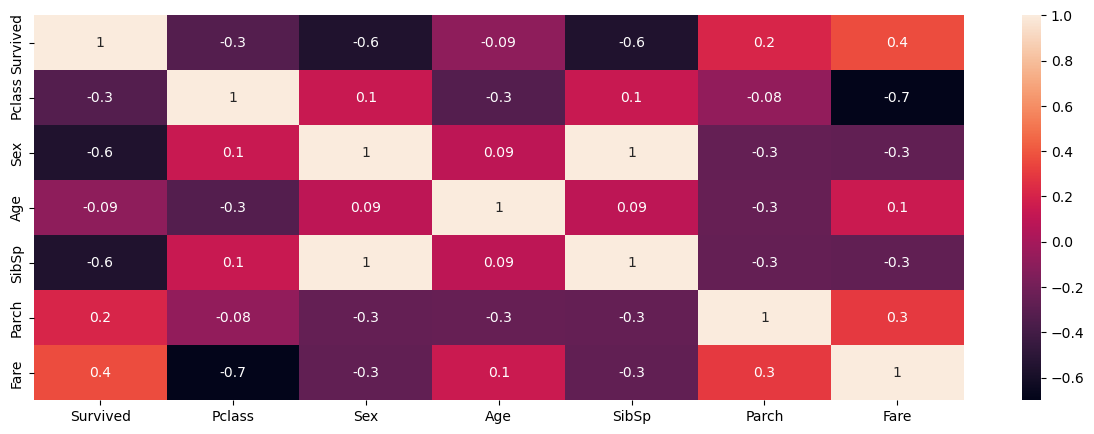

In [133]:
# Plotting heatmap
plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot =True, fmt ='0.1g')
plt.show()

__No multicollinearity issue found__

In [148]:
# Seperating Features and Label
x =df.drop(columns =['Survived'])
y =df['Survived']

In [149]:
# Data standarization using standard scaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.833995,0.722036,-0.641702,0.722036,-0.480921,-0.766275
1,-1.586804,-1.384973,0.675821,-1.384973,-0.480921,1.623850
2,0.833995,-1.384973,-0.312321,-1.384973,-0.480921,-0.703257
3,-1.586804,-1.384973,0.428785,-1.384973,-0.480921,1.204749
4,0.833995,0.722036,0.428785,0.722036,-0.480921,-0.691984
...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.229976,0.722036,-0.480921,-0.316660
816,-1.586804,-1.384973,-0.888737,-1.384973,-0.480921,0.500522
817,0.833995,-1.384973,-0.007717,-1.384973,2.445624,0.235725
818,-1.586804,0.722036,-0.312321,0.722036,-0.480921,0.500522


In [152]:
# Checking Variance inflation factor in each scaled data
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Values,Features
0,2.206011,Pclass
1,inf,Sex
2,1.236125,Age
3,inf,SibSp
4,1.261617,Parch
5,2.292512,Fare


### Building Model

### Finding best random state

In [155]:
maxrs =0
maxacc =0

for i in range (1,250):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc, "at random state :", maxrs)

Maximum accuracy is : 0.8658536585365854 at random state : 192


In [162]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [183]:
# Initializing models

RFR =RandomForestClassifier()
ETC =ExtraTreesClassifier()
LR =LogisticRegression()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DT =DecisionTreeClassifier()

In [184]:
models ={'RandomForestClassifier': RFR,
       'ExtraTreesClassifier': ETC,
       'LogisticRegression': LR,
       'SVC': svc,
       'GradientBoostingClassifier': GBC,
       'AdaBoostClassifier': ABC,
       'BaggingClassifier': BC,
       'DecisionTreesClassifier': DT}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print(name)
    print("Accuracy Score :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :", classification_report(y_test, pred))
    
    #Cross Validation
    print("Cross Validation")
    print("x"*20)
    score =cross_val_score(model, x, y, cv =5)
    print(score*100)
    print((score.mean())*100)
    print("Difference between accuracy score and cross validation is :", (acc -(score.mean()))*100)
    print('\n')
    print("="*50)

RandomForestClassifier
Accuracy Score : 80.0
Confusion Matrix :
 [[117  15]
 [ 26  47]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.89      0.85       132
           1       0.76      0.64      0.70        73

    accuracy                           0.80       205
   macro avg       0.79      0.77      0.77       205
weighted avg       0.80      0.80      0.80       205

Cross Validation
xxxxxxxxxxxxxxxxxxxx
[76.2195122  81.09756098 87.19512195 76.82926829 84.14634146]
81.09756097560977
Difference between accuracy score and cross validation is : -1.0975609756097682


ExtraTreesClassifier
Accuracy Score : 77.5609756097561
Confusion Matrix :
 [[116  16]
 [ 30  43]]
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.88      0.83       132
           1       0.73      0.59      0.65        73

    accuracy                           0.78       205
   macro avg       0.

__Based on the models performance we will choose SVC as per model__

### Hyperparameter tunning

In [192]:
parameters ={'C': [0.1, 10, 100, 300, 1000],
            'gamma':[1, 0.1, 0.01, 0.001],
            'kernel': ['rbf'],
            'random_state': [5, 99, 348, 387]}

In [193]:
GCV =GridSearchCV(SVC(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 300, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'],
                         'random_state': [5, 99, 348, 387]})

In [194]:
GCV.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 5}

In [195]:
Final_model =SVC(C =1000, gamma =0.01, kernel ='rbf', random_state =5)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy of Model is :", acc*100)

Accuracy of Model is : 81.46341463414633


__Accuracy of model increased after hyperparameter tunning__

In [198]:
# Saving the model
pickle.dump(Final_model, open('Titanic_Train.pkl', 'wb'))

In [204]:
# Loading Model
loaded_model =pickle.load(open('Titanic_Train.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)
print(pred)


81.46341463414633
[0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0]


In [206]:
# Comparing actual vs predicted
test =np.array(y_test)
df =pd.DataFrame()
df['Actual'] =test
df['Predicted'] =pred
df

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
200,1,0
201,0,1
202,1,1
203,0,0
